# Toolbox Template Expansion as a Service - Workflow


### Workflow Template and Binding Document

This is an update to the Template Expansion Workflow.ipynb notebook, which takes into account the information provided by the current Toolbox provenance API.

The cell below shows the example of a JSON binding document, *workflow_binding*, used to expand the PROV-Template that models the general execution information a Toolbox workflow. The binding examplifies an execution of the **Extract time series and plot graph** workflow that is available in the user workspace as default.

The updated templates are avalable at the following addresses for consultation.

single tool lineage
https://openprovenance.org/store/documents/2329

worklfow execution
https://openprovenance.org/store/documents/2328


The data used in the provenance documents are collected from the the json

### Software Requirements

The following python and prov modules are used by this notebook

*python = 3.7.2*

*prov = 1.5.1*

The remote Provenance Template Catalogue can be downloaded and installed through Docker, as explained here

https://github.com/EnvriPlus-PROV/ProvTemplateCatalog#setup-using-docker


### Local Expansion With ProvToolbox

The bindings presented in this notebook can be expanded also by using the ProvToolbox

https://lucmoreau.github.io/ProvToolbox/

Command line execution example:

```
provconvert -infile template.provn  -bindings binding.json  -outfile doc.json -bindver 3

```

### Execution of the Expansion as a service and Visualisation

The template is stored in a test instance of the Proveance Template Catalog Service, deployed on AWS. The service enables its management and expansion. 

The script below refers to the templates' ids *workflow_template_id* and *tool_template_id* and uses the expansion service indicated by the variable *host_name*.

The Provenance Catalgue's expansion service is invoked through a POST request.

In [7]:
import requests
from urllib.parse import urlencode, quote_plus


host_name = 'swirrl.climate4impact.eu/prov-template-catalog'
workflow_template_id = '5ec3db9c91f1cb3053608621'
tool_template_id = '5ec2b74391f1cb3053608620'


from prov.serializers.provjson import ProvJSONSerializer
from IPython.display import Image
import io
from prov.model import ProvDocument, ProvBundle, ProvException, first, Literal
from prov.dot import prov_to_dot


def provJSONtoPNG(doc,format):
     
    
    doc=ProvJSONSerializer.deserialize(ProvJSONSerializer,doc)
    dot = prov_to_dot(doc)
    
    if format=="png":
        dot.write_png('PROV.png')
        return 'PROV.png' 
    if format=="svg":
        dot.write_svg('PROV.svg')
        return 'PROV.svg'
    
    


## Obtain a Provenance Document for a single Tool (Binding)

Given the Template, in the cell below we provide an example of a JSON document that substitutes all the variables in the template **(var:&lt;varname&gt;)**. These are expressed as a list of literal values or **{"@id":"uuid:&lt;id&gt;"}** dictionaries.

Variables with the *"vargen"* namespace are automatically substituted  with a unique identifier **(uuid:&lt;identifier&gt;)**. This can be used to generate an uuid of a provenance element that has only one occurrence in the resulting document. For instance, when multiple input parameters are expected, *"var"* should be used in place of *"vargen"*, as in the example below. 

We are taking into account the lineage produced by a real execution of the ***Extract time series and plot graph*** workflow. The document is available at

https://earth.bsc.es/gitlab/external/c3s512-wp2-provenance/-/blob/master/ToolboxProvAPI_JSON

As example, we chosed to produce a binding for one of the ***cached*** request performing a ***cdstools.lonlat.extract_point*** operation.

The target Template is accessible at

https://openprovenance.org/store/documents/2329

The JSON is divided into 8 sections

1. The User that started the tool 
2. The Tool or Script 
3. The Software used to launch the script 
4. When and the tool was executed and for how long it run 
5. The parametrisation used 
6. Input Data 
7. Output Data and its format (ie. an image)
8. Namespaces Context (prefixes and reference vocabularies)

***NOTE:*** The of the ToolBox’s provenance API is not clear about the difference between the location of input and output files (they are the same) of a tool, and there is no recording about the ***executionStartTime*** and ***executionEndTime*** of a single process or a workflow. These values in points 4 6 and 7 are repeated, showing the ambiguity.

We have interepreted the response property **realm** as the user **@id** and the **top_request_origin** as the ***executionSoftware*** of which we report a unique **@id** for the version and its name. These are our guess and it should be confirmed by the Toolbox development team.

In [8]:
extract_timeseries="""
 {

  "var" : {
  
  
   "user":[{"@id": "uuid:26599"}],
   "name":["John Doe"],
   
   
   "accessUrlDocumentation":["https://git.ecmwf.int/projects/CST/repos/cdstools/commits/7f4d184cf8f0638cedd4039a4293b8afb674f392#cdstools/season.py"],
   "tool": [{"@id":"uuid:monyhly_trend0001"}],
   
   
   "executionSoftware":[{"@id":"uuid:gaia01"}],
   "label":["gaia"],
   "version":["8123a5edbf4c9332762e933eb966d816222f5bbf"],
   
   
   "toolreqid":[{"@id":"uuid:abd77718-c4cf-4f5e-bfba-0291a1ab532b"}],
   "senttToTmqAt":["2020-05-11T15:00:53.639Z"],
   "executionStartTime": ["2020-05-11T15:00:53.639Z"],
   "executionEndTime":["2020-05-11T15:00:53.639Z"],
   
   "parameter":[{"@id":"uuid:par0001"},{"@id":"uuid:par0002"}],
   "parkey":["lat","lon"],
   "parval": ["43","75"],
   "WFexecution":["uuid:8ba3ced8-0b2c-4ebb-a554-5674c0dccc16"],
   
   "input": [{"@id":"uuid:91991554"}],
   "accessUrlInp":["http://136.156.133.46/cache-compute-0015/cache/data6/cds.services.cdm_translate-1589185393.8862677-19295-13-b4f8139f-f64e-41ee-a9d2-2dee9b2e48d7_ERA5_REANALYSIS_air_temperature.nc"],
   "contentLenghtIn" :["427976239"],
   "contentType":["application/x-netcdf"],
   

   "derivtype": ["ds:Extraction"],
   "accessUrlOut":["http://136.156.133.46/cache-compute-0015/cache/data6/cds.services.cdm_translate-1589185393.8862677-19295-13-b4f8139f-f64e-41ee-a9d2-2dee9b2e48d7_ERA5_REANALYSIS_air_temperature.nc"],
   "generatedAt":["2020-05-11T15:00:53.639Z"],
   "contentLenghtOut":["427976239"],
   "resultType":["url"]
   
   
   
   
  },
  "context" : {
  
     "prov": "http://www.w3.org/ns/prov#",
     "xsd": "http://www.w3.org/2001/XMLSchema#",
     "tmpl": "http://openprovenance.org/tmpl#",
     "var": "http://openprovenance.org/var#",
     "c3s": "http://linktovoc.org/#",
     "uuid": "urn:uuid:",
     "http": "http:",
     "ds": "http://www.metaclip.org/datasource/datasource.owl#"
     

  }
}
"""


import json

datastore = json.loads(extract_timeseries)


print(datastore)

{'var': {'user': [{'@id': 'uuid:26599'}], 'name': ['John Doe'], 'accessUrlDocumentation': ['https://git.ecmwf.int/projects/CST/repos/cdstools/commits/7f4d184cf8f0638cedd4039a4293b8afb674f392#cdstools/season.py'], 'tool': [{'@id': 'uuid:monyhly_trend0001'}], 'executionSoftware': [{'@id': 'uuid:gaia01'}], 'label': ['gaia'], 'version': ['8123a5edbf4c9332762e933eb966d816222f5bbf'], 'toolreqid': [{'@id': 'uuid:abd77718-c4cf-4f5e-bfba-0291a1ab532b'}], 'senttToTmqAt': ['2020-05-11T15:00:53.639Z'], 'executionStartTime': ['2020-05-11T15:00:53.639Z'], 'executionEndTime': ['2020-05-11T15:00:53.639Z'], 'parameter': [{'@id': 'uuid:par0001'}, {'@id': 'uuid:par0002'}], 'parkey': ['lat', 'lon'], 'parval': ['43', '75'], 'WFexecution': ['uuid:8ba3ced8-0b2c-4ebb-a554-5674c0dccc16'], 'input': [{'@id': 'uuid:91991554'}], 'accessUrlInp': ['http://136.156.133.46/cache-compute-0015/cache/data6/cds.services.cdm_translate-1589185393.8862677-19295-13-b4f8139f-f64e-41ee-a9d2-2dee9b2e48d7_ERA5_REANALYSIS_air_tempe

### Expansion and visualisation 

{"prefix": {"ex": "http://example.com/#", "provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "rdfs": "http://www.w3.org/2000/01/rdf-schema#", "s-prov": "https://github.com/aspinuso/s-provenance/blob/master/resources/s-prov-o.owl", "c3s": "http://linktovoc.org/#", "tmpl": "http://openprovenance.org/tmpl#", "var": "http://openprovenance.org/var#", "vcard": "http://www.w3.org/2006/vcard/ns#", "xml": "http://www.w3.org/XML/1998/namespace", "ds": "http://www.metaclip.org/datasource/datasource.owl#", "http": "http:", "uuid": "urn:uuid:", "vargen": "http://openprovenance.org/vargen#", "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#"}, "bundle": {"uuid:61ace310-b7f2-4fc2-9ab9-d7246ed3fa32": {"prefix": {"uuid": "urn:uuid:", "provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "c3s": "http://linktovoc.org/#", "var": "http://openprovenance.org/var#", "vargen": "http://openprovenance.org/vargen#", "vcard": "http://www.w3.org/2006/vcard/ns#"}, "entity": {"uuid:9199

/Users/aspinuso2/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swirrl.climate4impact.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


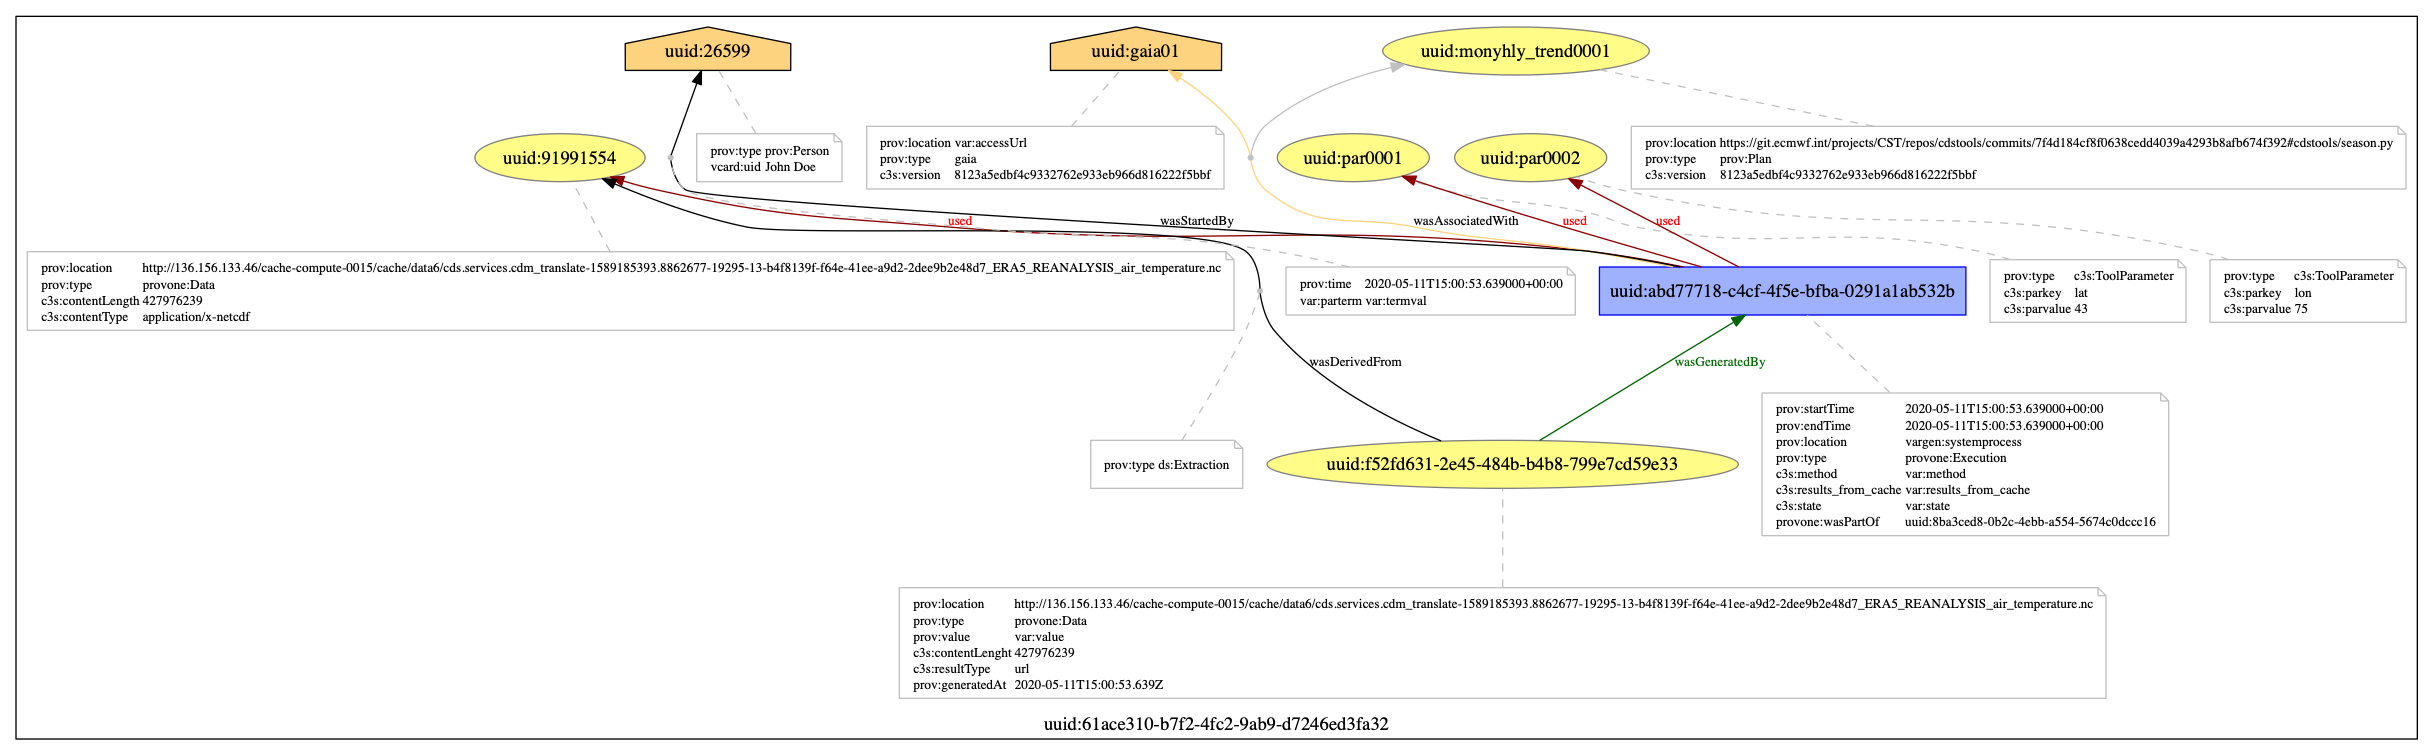

In [9]:

extract_time_sr  = requests.post('https://' + host_name + '/api/templates/' + tool_template_id + 
    '/expand?fmt=provjson&writeprov=false&bindver=v3',
        data=extract_timeseries, verify=False)

 

print(extract_time_sr.text)

t = io.StringIO(extract_time_sr.text)
png_content=provJSONtoPNG(t,"png")

Image(png_content)

## Obtain a Provenance Document for a Workflow Run (Binding)

The tool is executed in the context of a larger workflow (or application, or project different terms are used in the API response). Below we report the binding of a template that deal with cached execution.

https://openprovenance.org/store/documents/2328

The biding is divided into sections.

1. The users that started the main and cached workflows
2. The workflow details 
3. The Software used to launch the workflow 
4. When and the workflow was executed and for how long it run 
5. The parametrisation used 
6. Input Data and its format and size
7. Output Data and its format and size
8. Namespaces Context (prefixes and reference vocabularies)

***NOTE:*** The example shows an execution which returns ***cached** results. See in the visualisation the ***wasInformedBy*** relatioship between the execution request in the cache and and the new workflow. The document also shows the the two workflow execution requests (Blue Box) are submitted by different user but use the same workflow code and parameters.

In [10]:

workflow_binding="""

{
  "var" : {
  
   "user":[{"@id": "uuid:8721"}],
   "name":["John Doe"],
   "startedAt": ["2020-05-11T15:00:51.93Z"],
   
   
   "userCached":[{"@id": "uuid:26599"}],
   "nameCached":["Jim Morrison"],
   "startedAtCached": ["2020-05-11T15:00:51.93Z"],
   
   
   "Workflow":[{"@id":"uuid:Workflow0001"}],
   "code":["import cdstoolbox as ctlayout = {    'input_ncols': 3,.....    "],
   "wfname":["plot_time_series"],
   "wftype":["ds:Trend"],
   "accessUrlDocumentation":["https://cds.climate.copernicus.eu/toolbox-editor/8721/03-extract-time-series-and-plot-graphsss"],
   
   
   "parameter":[{"@id":"uuid:wfpar0001"},{"@id":"uuid:wfpar0002"},{"@id":"uuid:wfpar0003"}],
   "parkey":["lat","lon","val"],
   "parval": ["43","57","Near-Surface Air Temperature"],
  
   "WFExecution":[{"@id":"uuid:ca335e3d-0f32-4083-ac7e-c2262b92b341"}],
   "wfstart": ["2020-05-11T15:00:51.93Z"],
   "wfend":["2020-05-11T15:00:51.93Z"],
   "project":["03-extract-time-series-and-plot-graph"],
   
   
   "WFExecutionCached":[{"@id":"uuid:8ba3ced8-0b2c-4ebb-a554-5674c0dccc16"}],
   "wfstartCached":["2020-05-11T15:00:51.93Z"],
   "wfendCached":["2020-05-11T15:00:51.93Z"],
   "projectCached":["03-extract-time-series-and-plot-graph"],
   
   
   "executionSoftware":[{"@id":"uuid:gaia01"}],
   "label":["gaia"],
   "version":["8123a5edbf4c9332762e933eb966d816222f5bbf"],
   
   
   "result":["[{'contentLength':124489,'contentType':....'application/vnd.plotly.v1+json','location':'http://136.156.133.25/cache-compute-0008/cache/data3/474131c7-5aff-420a-85fe-793ecd74a255.plotly','logging':'','resultType':'url'}]"]
  
   
   
    
   
   
  },
  "context" : {
  
    "prov": "http://www.w3.org/ns/prov#",
    "xsd": "http://www.w3.org/2001/XMLSchema#" ,
    "tmpl": "http://openprovenance.org/tmpl#" ,
    "var": "http://openprovenance.org/var#" ,
    "ex": "http://example.com/#" ,
    "http": "http:",
    "c3s": "http://www.c3s.org/#",
     "ds": "http://www.metaclip.org/datasource/datasource.owl#",
     "uuid": "urn:uuid:",
     "https": "https:"
   }
 }

"""




### Expansion and visualisation 

/Users/aspinuso2/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swirrl.climate4impact.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


{"prefix": {"ex": "http://example.com/#", "provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "rdfs": "http://www.w3.org/2000/01/rdf-schema#", "s-prov": "https://github.com/aspinuso/s-provenance/blob/master/resources/s-prov-o.owl", "c3s": "http://linktovoc.org/#", "tmpl": "http://openprovenance.org/tmpl#", "var": "http://openprovenance.org/var#", "vcard": "http://www.w3.org/2006/vcard/ns#", "xml": "http://www.w3.org/XML/1998/namespace", "ds": "http://www.metaclip.org/datasource/datasource.owl#", "http": "http:", "uuid": "urn:uuid:", "vargen": "http://openprovenance.org/vargen#", "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#", "https": "https:", "c3s_1": "http://www.c3s.org/#"}, "bundle": {"uuid:ToolboxWorkflowExecution": {"prefix": {"uuid": "urn:uuid:", "c3s": "http://linktovoc.org/#", "var": "http://openprovenance.org/var#", "provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "s-prov": "https://github.com/aspinuso/s-provenance/blob/master/resources/

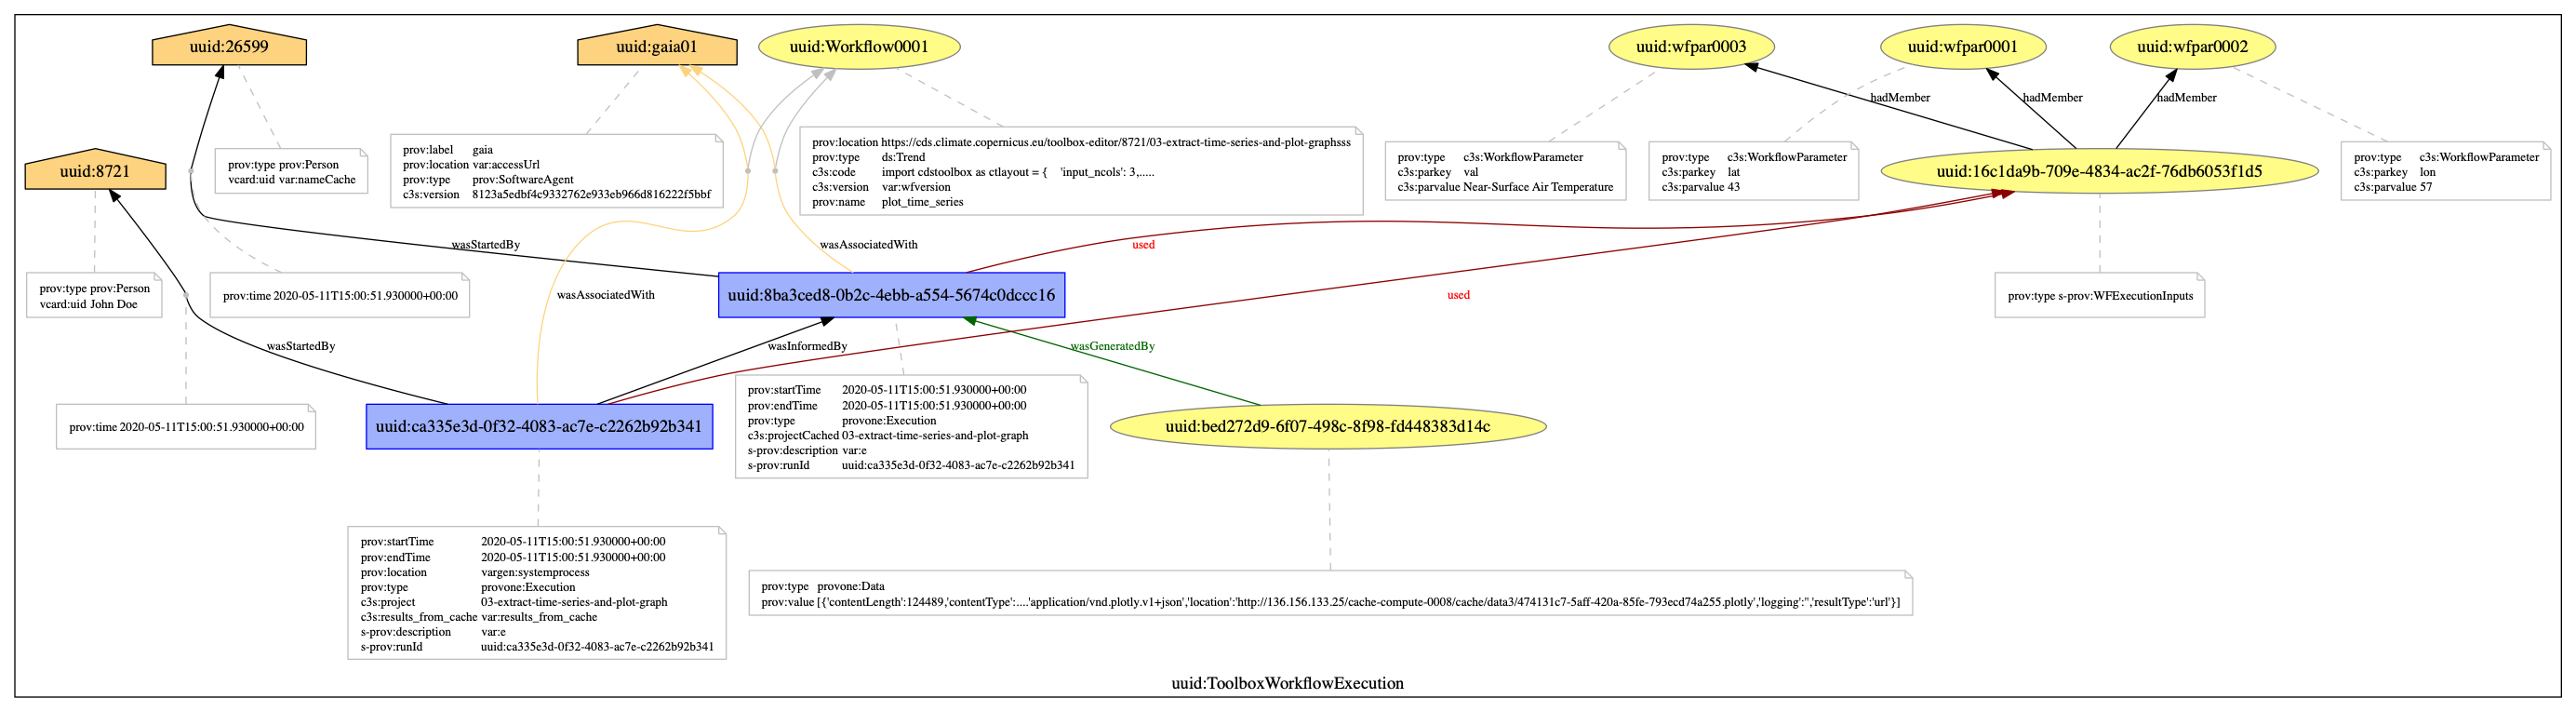

In [11]:
workflow = requests.post('https://' + host_name + '/api/templates/' + workflow_template_id + 
    '/expand?fmt=provjson&writeprov=false&bindver=v3',
        data=workflow_binding, verify=False)

print(workflow.text)



w = io.StringIO(workflow.text)
png_content=provJSONtoPNG(w,"png")


 

Image(png_content)


### Merging in a single view

The two single documents can be merged into one, where all the entities are connected in a comprehensive view.

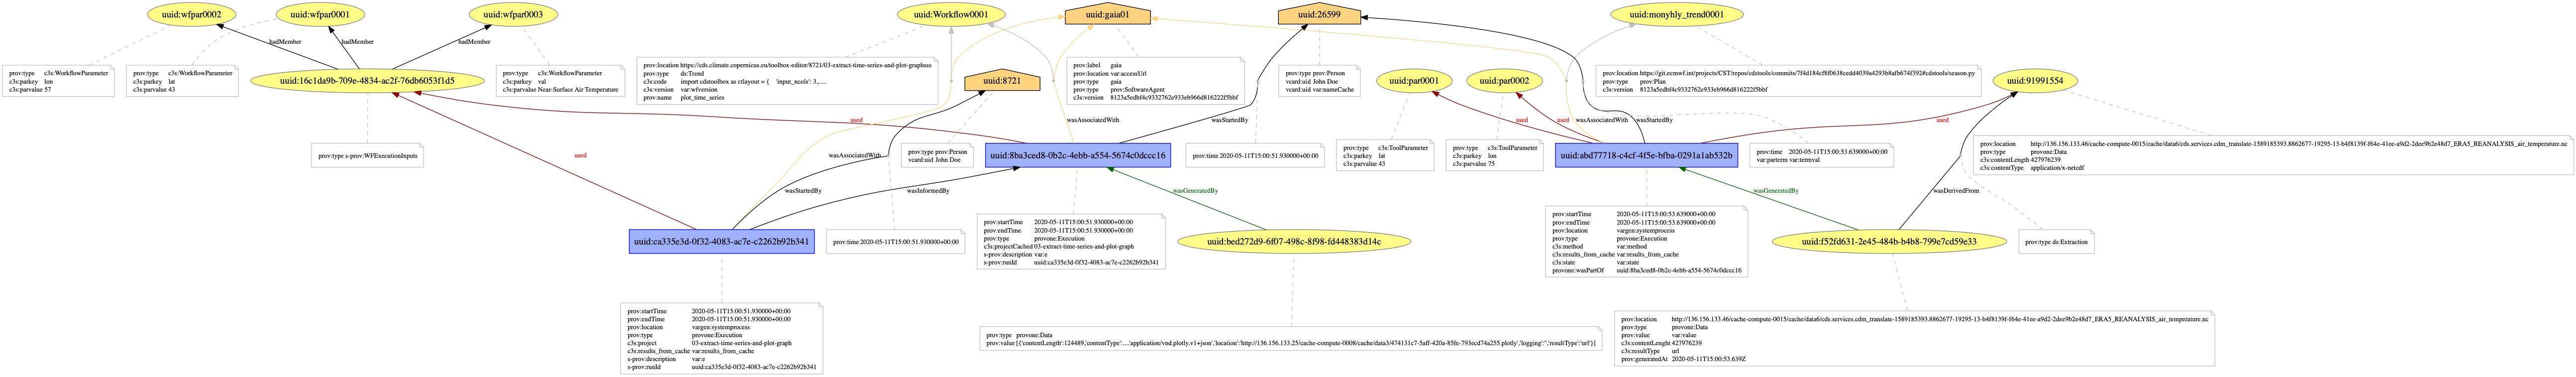

In [12]:


doc_tool=ProvJSONSerializer.deserialize(ProvJSONSerializer,io.StringIO(extract_time_sr.text))
doc_workflow=ProvJSONSerializer.deserialize(ProvJSONSerializer,io.StringIO(workflow.text))
doc_workflow.add_bundle(list(doc_tool.bundles)[0])

png_content=provJSONtoPNG(io.StringIO(doc_workflow.flattened().serialize()),"png")

Image(png_content)